In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

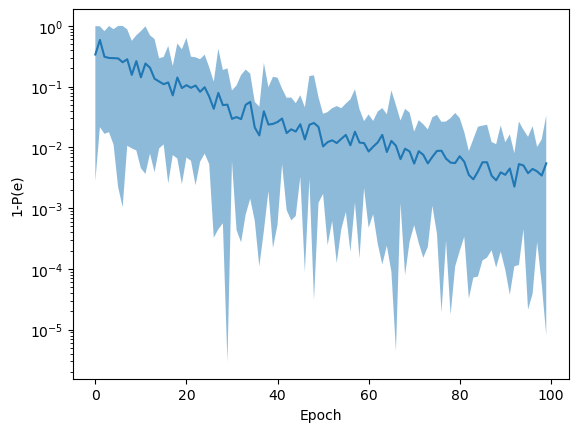

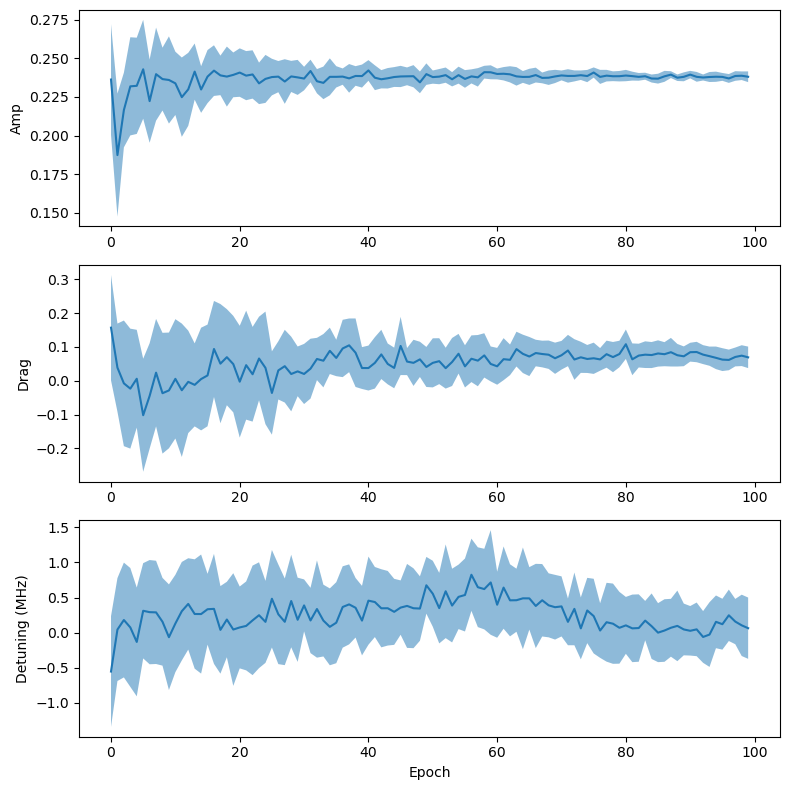

In [10]:
# Author: Ben Brock 
# Created on May 03, 2023 

root_dir = os.getcwd()
filename = root_dir + r'./20240727-011829.h5'
run = '0'

f = h5py.File(filename, 'r')

rl_params = {key: item
             for key, item in f[run]['rl_params'].attrs.items()
             }
action_scale = {key: item
                for key, item in f[run]['rl_params']['action_scale'].attrs.items()
                }
action_script = {key: item
                 for key, item in f[run]['rl_params']['action_script'].attrs.items()
                 }
to_learn = {key: item
            for key, item in f[run]['rl_params']['to_learn'].attrs.items()
            }

training_actions = {key: item[()]
                    for key, item in f[run]['training']['actions'].items()
                    }
training_rewards = f[run]['training']['rewards'][()]

evaluation_actions = {key: item[()]
                      for key, item in f[run]['evaluation']['actions'].items()
                      }
evaluation_rewards = f[run]['evaluation']['rewards'][()]

f.close()

# %%

epochs = np.arange(rl_params['num_epochs'])

infidelity = (1 - training_rewards) / 2.0
mean_infidelity = np.mean(infidelity, axis=1)
stdev_infidelity = np.std(infidelity, axis=1)
min_infidelity = np.amin(infidelity, axis=1)
max_infidelity = np.amax(infidelity, axis=1)
fig, ax = plt.subplots(1, 1)
ax.plot(epochs, mean_infidelity)
ax.fill_between(epochs,
                min_infidelity,
                max_infidelity,
                alpha=0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('1-P(e)')
ax.set_yscale('log')
plt.show()

# %%


mean_amp = np.mean(training_actions['amp'], axis=1)
stdev_amp = np.std(training_actions['amp'], axis=1)
min_amp = np.amin(training_actions['amp'], axis=1)
max_amp = np.amax(training_actions['amp'], axis=1)

mean_drag = np.mean(training_actions['drag'], axis=1)
stdev_drag = np.std(training_actions['drag'], axis=1)
min_drag = np.amin(training_actions['drag'], axis=1)
max_drag = np.amax(training_actions['drag'], axis=1)

mean_detuning = np.mean(training_actions['detuning'], axis=1) * 1e3
stdev_detuning = np.std(training_actions['detuning'], axis=1) * 1e3
min_detuning = np.amin(training_actions['detuning'], axis=1) * 1e3
max_detuning = np.amax(training_actions['detuning'], axis=1) * 1e3

fig, axarr = plt.subplots(3, 1, figsize=(8, 8))

axarr[0].plot(epochs, mean_amp)
axarr[0].fill_between(epochs,
                      mean_amp - stdev_amp,
                      mean_amp + stdev_amp,
                      alpha=0.5)
axarr[0].set_ylabel('Amp')

axarr[1].plot(epochs, mean_drag)
axarr[1].fill_between(epochs,
                      mean_drag - stdev_drag,
                      mean_drag + stdev_drag,
                      alpha=0.5)
axarr[1].set_ylabel('Drag')

axarr[2].plot(epochs, mean_detuning)
axarr[2].fill_between(epochs,
                      mean_detuning - stdev_detuning,
                      mean_detuning + stdev_detuning,
                      alpha=0.5)
axarr[2].set_ylabel('Detuning (MHz)')
axarr[2].set_xlabel('Epoch')

plt.tight_layout()
plt.show()
# %%
